In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk

In [2]:
df_match = pd.read_csv('Matches_Data.csv')

df_match['Match'] = df_match['Date'] + ' - ' + df_match['Team1'] + ' vs ' + df_match['Team2'] + ' (' + df_match['Round'] + ')'

df_score = pd.read_csv('Scores_Data.csv')

In [3]:
def match_selector(df_match):
    # Create main window
    root = tk.Tk()
    root.title("Cricket Match Analysis")
    root.geometry("450x300")
    
    # Variables
    mtc = tk.StringVar(value=df_match['Match'].iloc[4])
    inn = tk.StringVar()
    start_over = tk.IntVar(value=10)
    end_over = tk.IntVar(value=50)
    
    # Create a main frame with padding
    main_frame = ttk.Frame(root, padding="10")
    main_frame.pack(fill="both", expand=True)
    
    # 1. Match Selection
    
    ttk.Label(main_frame, text="Match:").grid(row=1, column=0, sticky="w", pady=5)
    match_dropdown = ttk.Combobox(main_frame, textvariable=mtc, values=df_match['Match'].tolist(), 
                width=25, state="readonly")
    match_dropdown.grid(row=1, column=1, pady=5)
    
    # 2. Innings Selection
    ttk.Label(main_frame, text="Batting Team:").grid(row=2, column=0, sticky="w", pady=5)
    team_dropdown = ttk.Combobox(main_frame, textvariable=inn, width=25, state="readonly")
    team_dropdown.grid(row=2, column=1, pady=5)
    
    # 3. Over Range Selection
    ttk.Label(main_frame, text="Start Over:").grid(row=3, column=0, sticky="w", pady=5)
    ttk.Combobox(main_frame, textvariable=start_over, values=list(range(0, 51)), 
                width=10, state="readonly").grid(row=3, column=1, sticky="w", pady=5)
    
    ttk.Label(main_frame, text="End Over:").grid(row=4, column=0, sticky="w", pady=5)
    ttk.Combobox(main_frame, textvariable=end_over, values=list(range(10, 51)), 
                width=10, state="readonly").grid(row=4, column=1, sticky="w", pady=5)
    
    # Function to update team options based on selected match
    def update_team_options(*args):
        selected_match = mtc.get()
        match_row = df_match[df_match['Match'] == selected_match]
        if not match_row.empty:
            team1 = match_row['Team1'].iloc[0]
            team2 = match_row['Team2'].iloc[0]
            team_dropdown['values'] = [team1, team2]
            inn.set(team1)  # Default to first team
    
    # Bind the function to match selection changes
    mtc.trace_add('write', update_team_options)
    
    # Initialize team dropdown with teams from default match
    update_team_options()
    
    # Apply button that closes the window
    def on_apply():
        # Here you would process the selections further if needed
        print(f"Selected: {mtc.get()}, {inn.get()}, {start_over.get()}-{end_over.get()}")
        root.destroy()  # Close the window
    
    ttk.Button(main_frame, text="Apply", command=on_apply).grid(row=5, column=0, columnspan=2, pady=15)
    
    return root, mtc, inn, start_over, end_over

In [4]:
df_match = pd.read_csv('Matches_Data.csv')

df_match['Match'] = df_match['Date'] + ' - ' + df_match['Team1'] + ' vs ' + df_match['Team2'] + ' (' + df_match['Round'] + ')'

print(len(df_match))
df_match.head()

48


,Event,Round,Match_no,Date,Venue,City,Team1,Team2,Winner,Match
0,ICC Cricket World Cup,Group Stage,1,10/5/2023,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,England,New Zealand,New Zealand,10/5/2023 - England vs New Zealand (Group Stage)
1,ICC Cricket World Cup,Group Stage,2,10/6/2023,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Hyderabad,Pakistan,Netherlands,Pakistan,10/6/2023 - Pakistan vs Netherlands (Group Stage)
2,ICC Cricket World Cup,Group Stage,3,10/7/2023,"Himachal Pradesh Cricket Association Stadium, ...",Dharamsala,Afghanistan,Bangladesh,Bangladesh,10/7/2023 - Afghanistan vs Bangladesh (Group S...
3,ICC Cricket World Cup,Group Stage,4,10/7/2023,"Arun Jaitley Stadium, Delhi",Delhi,South Africa,Sri Lanka,South Africa,10/7/2023 - South Africa vs Sri Lanka (Group S...
4,ICC Cricket World Cup,Group Stage,5,10/8/2023,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,Australia,India,India,10/8/2023 - Australia vs India (Group Stage)


In [5]:
window, mtc, inn, start_over, end_over = match_selector(df_match)
window.mainloop()

Selected: 10/8/2023 - Australia vs India (Group Stage), Australia, 20-40


In [6]:
df_score = pd.read_csv('Scores_Data.csv')

print(len(df_score))
df_score.head()

26119


,Match_no,Batting,Innings,Over_no,Batsman,Bowler,Non_Striker,Bat_Score,Extras_Score,Extras_Bool,Extras,Wicket_Type,Wicket_Bool,Player_Out,Run_Total,Wicket_Count
0,1,England,1,0.1,JM Bairstow,TA Boult,DJ Malan,0,0,False,NaN,NaN,False,NaN,0,0
1,1,England,1,0.2,JM Bairstow,TA Boult,DJ Malan,6,0,False,NaN,NaN,False,NaN,6,0
2,1,England,1,0.3,JM Bairstow,TA Boult,DJ Malan,1,0,False,NaN,NaN,False,NaN,7,0
3,1,England,1,0.4,DJ Malan,TA Boult,JM Bairstow,1,0,False,NaN,NaN,False,NaN,8,0
4,1,England,1,0.5,JM Bairstow,TA Boult,DJ Malan,4,0,False,NaN,NaN,False,NaN,12,0


In [7]:
mtc_no = df_match['Match_no'].loc[df_match['Match'] == (mtc.get())].iloc[0]

print(type(mtc_no))
print(mtc_no)

<class 'numpy.int64'>
5


In [8]:
df = df_score.loc[(df_score['Match_no'] == mtc_no) & (df_score['Over_no'] >= start_over.get())
                    & (df_score['Over_no'] <= end_over.get()) & (df_score['Batting'] == inn.get())].reset_index(drop = True)

In [9]:
print(len(df))
df.head()

122


,Match_no,Batting,Innings,Over_no,Batsman,Bowler,Non_Striker,Bat_Score,Extras_Score,Extras_Bool,Extras,Wicket_Type,Wicket_Bool,Player_Out,Run_Total,Wicket_Count
0,5,Australia,1,20.1,SPD Smith,Kuldeep Yadav,M Labuschagne,0,0,False,NaN,NaN,False,NaN,85,2
1,5,Australia,1,20.2,SPD Smith,Kuldeep Yadav,M Labuschagne,1,0,False,NaN,NaN,False,NaN,86,2
2,5,Australia,1,20.3,M Labuschagne,Kuldeep Yadav,SPD Smith,0,0,False,NaN,NaN,False,NaN,86,2
3,5,Australia,1,20.4,M Labuschagne,Kuldeep Yadav,SPD Smith,0,0,False,NaN,NaN,False,NaN,86,2
4,5,Australia,1,20.5,M Labuschagne,Kuldeep Yadav,SPD Smith,1,0,False,NaN,NaN,False,NaN,87,2


In [10]:
h2h_df = df.groupby(['Bowler', 'Batsman']).agg({'Over_no' : 'nunique', 'Bat_Score' : 'sum', 'Wicket_Bool' : 'max', 'Wicket_Type' : lambda x: ', '.join(x.dropna())}).reset_index()

h2h_df.columns = ['Bowler', 'Batsman', 'Balls', 'Runs', 'Out', 'Wicket']

h2h_df['Wicket'] = h2h_df['Wicket'].apply(lambda x: 'not out' if pd.isna(x) or (isinstance(x, str) and x.strip() == '') else x)

h2h_df.head()

,Bowler,Batsman,Balls,Runs,Out,Wicket
0,JJ Bumrah,C Green,4,1,False,not out
1,JJ Bumrah,GJ Maxwell,8,2,False,not out
2,Kuldeep Yadav,C Green,2,1,False,not out
3,Kuldeep Yadav,GJ Maxwell,6,3,True,bowled
4,Kuldeep Yadav,M Labuschagne,10,9,False,not out


In [11]:
def h2h_matrix(df):
    # Get unique bowlers and batsmen for indexing
    unique_bowlers = df['Bowler'].unique()
    unique_batsmen = df['Batsman'].unique()
    
    # Create empty DataFrame with batsmen as columns and bowlers as rows
    # Note: This is flipped from the previous version
    matrix = pd.DataFrame(index=unique_bowlers, columns=unique_batsmen)
    
    # Fill the matrix with the required format: runs (balls), wicket
    for bowler in unique_bowlers:
        for batsman in unique_batsmen:
            # Filter data for this bowler-batsman pair
            subset = df[(df['Bowler'] == bowler) & (df['Batsman'] == batsman)]
            
            if len(subset) > 0:
                # Sum runs, count balls, and get wicket info
                total_runs = subset['Runs'].sum()
                total_balls = subset['Balls'].sum()
                
                # Check if batsman was dismissed by this bowler
                dismissals = subset[subset['Out'] == True]
                if len(dismissals) > 0:
                    # Get the mode of dismissal
                    wicket_type = dismissals['Wicket'].iloc[0]
                    
                    # Strip any leading/trailing spaces from wicket_type
                    if isinstance(wicket_type, str):
                        wicket_type = wicket_type.strip()
                else:
                    wicket_type = 'not out'
                
                # Format the cell content
                cell_content = f"{total_runs} ({total_balls}), {wicket_type}"
                matrix.loc[bowler, batsman] = cell_content
            else:
                # No confrontation between this pair
                matrix.loc[bowler, batsman] = np.nan
    
    # Replace NaN with empty strings
    matrix = matrix.fillna('')
    
    return matrix

# Display with neat square tiles using pandas styling
def style_h2h_matrix(matrix):
    # Apply styling to make the cells appear as neat square tiles
    return matrix.style.set_properties(**{
        'text-align': 'center',
        'width': '100px',  # Fixed width
        'height': '100px', # Fixed height
        'white-space': 'pre-wrap', # Allow line breaks
        'border': '1px solid black',
        'padding': '8px',
        'font-size': '9pt',
        'background-color': '#f9f9f9',
        'vertical-align': 'middle'
    }).set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#e6e6e6'),
            ('color', 'black'),
            ('font-weight', 'bold'),
            ('border', '1px solid black'),
            ('padding', '8px'),
            ('text-align', 'center')
        ]},
        {'selector': '', 'props': [
            ('border-collapse', 'collapse'),
            ('color', 'black'),
            ('width', 'auto'),
            ('margin', '0 auto')
        ]}
    ])



In [12]:
# Create the matrix
confusion_matrix = h2h_matrix(h2h_df)

# Display the styled matrix
styled_matrix = style_h2h_matrix(confusion_matrix)
styled_matrix


,C Green,GJ Maxwell,M Labuschagne,MA Starc,PJ Cummins,SPD Smith,AT Carey
JJ Bumrah,"1 (4), not out","2 (8), not out",,,,,
Kuldeep Yadav,"1 (2), not out","3 (6), bowled","9 (10), not out","2 (3), not out","11 (10), not out","4 (5), not out",
Mohammed Siraj,,,"6 (4), not out",,,"2 (8), not out",
R Ashwin,"2 (6), caught","2 (2), not out",,"2 (8), not out","1 (2), not out",,
RA Jadeja,"4 (8), not out","8 (9), not out","4 (16), caught",,,"4 (7), bowled","0 (2), lbw"


In [13]:
scr_df = df.groupby('Over_no').agg({'Run_Total' : 'max', 'Wicket_Count' : 'max'}).reset_index()

scr_df.columns = ['Over', 'Runs', 'Wickets']
scr_df.head()

,Over,Runs,Wickets
0,20.1,85,2
1,20.2,86,2
2,20.3,86,2
3,20.4,86,2
4,20.5,87,2


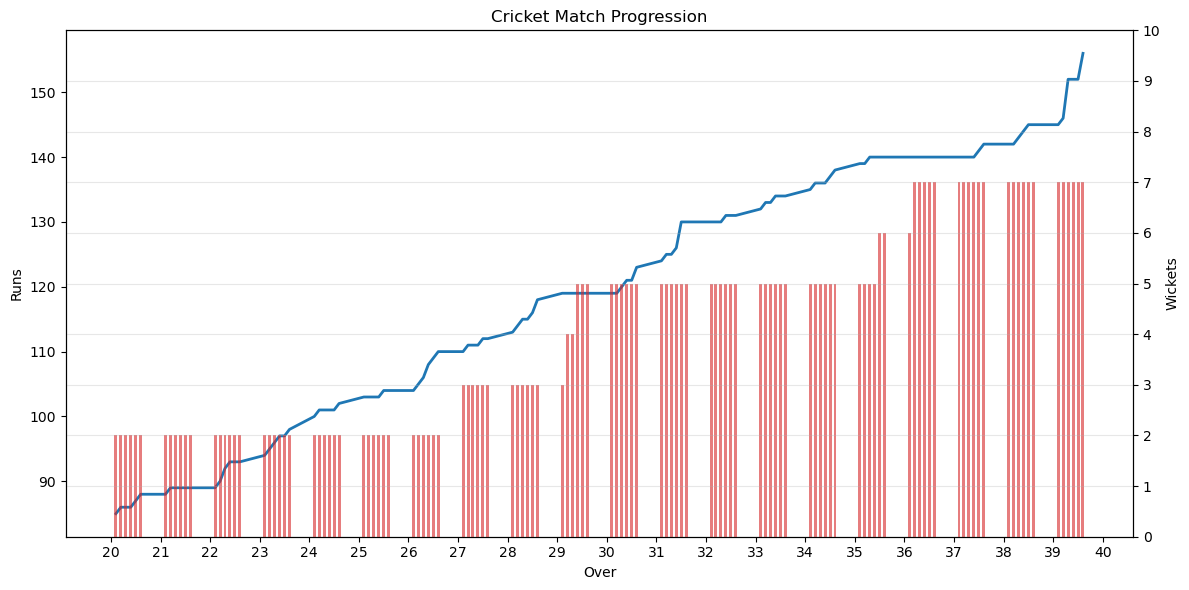

In [24]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot runs on the primary y-axis (left) - removed the 'o' marker
ax1.set_xlabel('Over', color='black')
ax1.set_ylabel('Runs', color='black')
ax1.plot(scr_df['Over'], scr_df['Runs'], color='tab:blue', linestyle='-', linewidth=2)
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x', colors='black')

# Create secondary y-axis (right) for wickets
ax2 = ax1.twinx()
ax2.set_ylabel('Wickets', color='black')

# Get the unique values in the 'Over' column for the bar positions
unique_overs = scr_df['Over'].unique()

# Create bar plot for wickets using unique overs - reduced width to 0.06
width = 0.06
ax2.bar(unique_overs, scr_df.loc[scr_df['Over'].isin(unique_overs), 'Wickets'], 
        width=width, color='tab:red', alpha=0.6)
ax2.tick_params(axis='y', colors='black')

# Set the y-axis range for wickets from 0 to 10
ax2.set_ylim(0, 10)

# Set integer ticks for wickets axis
ax2.set_yticks(np.arange(0, 11, 1))

# Set integer ticks for x-axis (overs)
max_over = np.ceil(scr_df['Over'].max())
ax1.set_xticks(np.arange(scr_df['Over'].min() - 0.1, scr_df['Over'].max() + 1, 1))

# Add title and adjust layout
plt.title('Cricket Match Progression', color='black')
plt.grid(True, alpha=0.3)
fig.tight_layout()

# Display the plot
plt.show()